In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer #normalizacion y discretizacion para el set de datos
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR #SVM de clasificacion y SVM de regresion
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.metrics import accuracy_score #Accuracy para clasificacion
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("./dataset/train.csv")
df = df.dropna(axis = 1) #eliminar columnas con NAN
df_categorical = pd.DataFrame.copy(df)

# Random Forest

#### Random Forest clasificacion

In [40]:
X = df_categorical.drop(columns = ["SalePrice"]).select_dtypes(np.number)
Y = KBinsDiscretizer(n_bins = 30, encode = "ordinal", strategy = "kmeans").fit_transform(df_categorical[["SalePrice"]]) #creo 30 intervalos distintos
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42) #80% entrenaminto - 20% pruebas

In [41]:
#entrenamiento del modelo randomForest
rf = RandomForestClassifier(n_estimators = 71, max_depth= 7)
rf.fit(x_train,y_train) #entrenamiento del modelo
train_prediction = rf.predict(x_train) 
accuracy_score(y_train, train_prediction) #score de entrenamiento

C:\Users\Admin\AppData\Local\Temp\ipykernel_18336\4196540014.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train) #entrenamiento del modelo


0.8356164383561644

In [42]:
test_prediction = rf.predict(x_test)
accuracy_score(y_test, test_prediction) #score de prueba

0.3458904109589041

##### Graficas comparativas

Variacion de intervalos

In [ ]:
#Probando desempeño del modelo con diferentes intervalos
rf = RandomForestClassifier(n_estimators = 71, max_depth= 7)
intervals = [i for i in range(5, 51, 5)]
train_scores = []
test_scores = []
X = df_categorical.drop(columns = ["SalePrice"]).select_dtypes(np.number)
for interval in intervals:
    Y = KBinsDiscretizer(n_bins = interval, encode = "ordinal", strategy = "kmeans").fit_transform(df_categorical[["SalePrice"]]) #creo n intervalos distintos
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42) #80% entrenaminto - 20% pruebas
    rf.fit(x_train,y_train)
    train_prediction = rf.predict(x_train)
    test_prediction = rf.predict(x_test)
    train_score = round(accuracy_score(y_train, train_prediction), 3) 
    test_score = round(accuracy_score(y_test, test_prediction), 3)
    train_scores.append(train_score)
    test_scores.append(test_score)

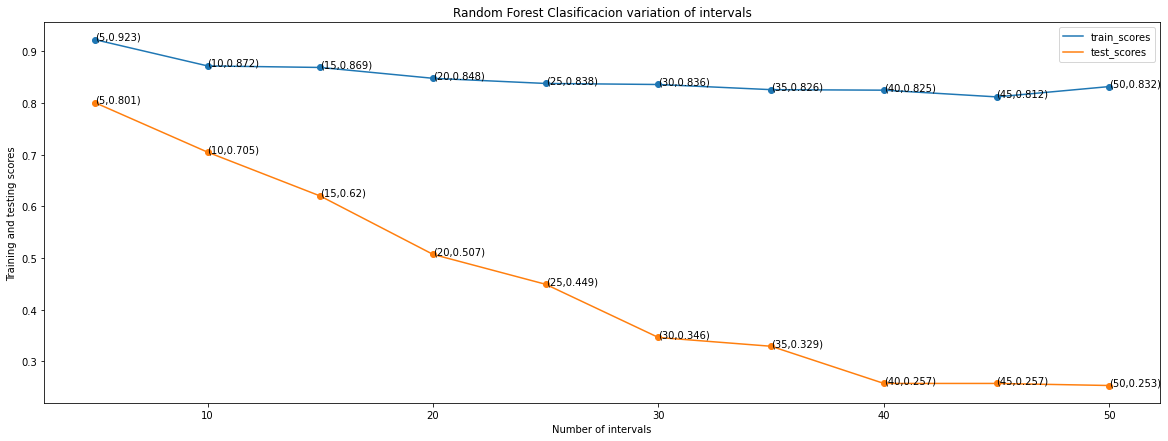

In [44]:
fig, axs = plt.subplots(figsize = (20,7))
plt.scatter(intervals, train_scores)
plt.plot(intervals, train_scores)
plt.scatter(intervals, test_scores)
plt.plot(intervals, test_scores)
plt.title("Random Forest Clasificacion variation of intervals")
plt.legend(["train_scores", "test_scores"])
plt.xlabel("Number of intervals")
plt.ylabel("Training and testing scores")
for i in range(0, len(train_scores)):
    plt.annotate(f"({intervals[i]},{train_scores[i]})", (intervals[i], train_scores[i]))
    plt.annotate(f"({intervals[i]},{test_scores[i]})", (intervals[i], test_scores[i]))
plt.show()

Variacion de numero de arboles

In [ ]:
estimators = [i for i in range(10, 101, 10)]
train_scores = []
test_scores = []
X = df_categorical.drop(columns = ["SalePrice"]).select_dtypes(np.number)
Y = KBinsDiscretizer(n_bins = 10, encode = "ordinal", strategy = "kmeans").fit_transform(df_categorical[["SalePrice"]])
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42) #80% entrenaminto - 20% pruebas
for estimator in estimators:
    rf = RandomForestClassifier(n_estimators = estimator, max_depth= 3)
    rf.fit(x_train,y_train)
    train_prediction = rf.predict(x_train)
    test_prediction = rf.predict(x_test)
    train_score = round(accuracy_score(y_train, train_prediction), 3) 
    test_score = round(accuracy_score(y_test, test_prediction), 3)
    train_scores.append(train_score)
    test_scores.append(test_score)
        

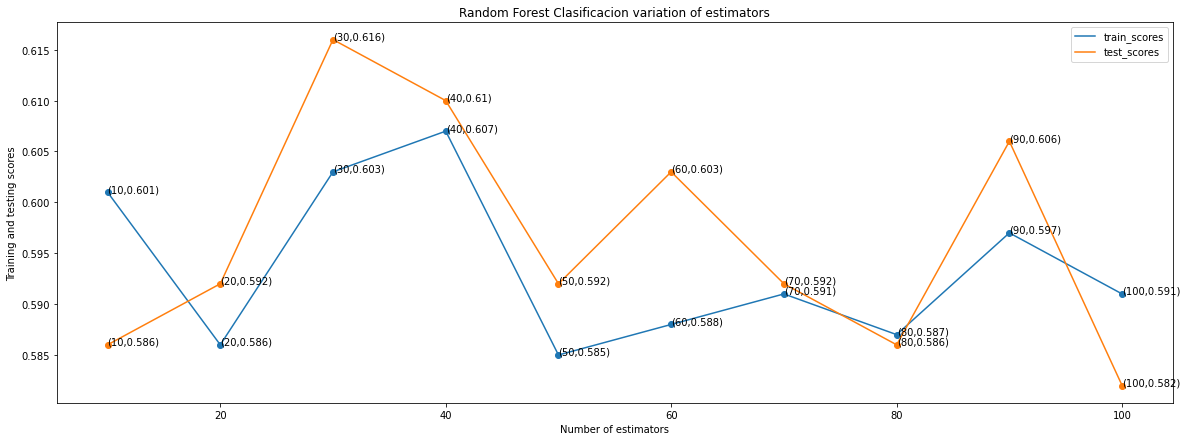

In [46]:
fig, axs = plt.subplots(figsize = (20,7))
plt.scatter(estimators, train_scores)
plt.plot(estimators, train_scores)
plt.scatter(estimators, test_scores)
plt.plot(estimators, test_scores)
plt.title("Random Forest Clasificacion variation of estimators")
plt.legend(["train_scores", "test_scores"])
plt.xlabel("Number of estimators")
plt.ylabel("Training and testing scores")
for i in range(0, len(train_scores)):
    plt.annotate(f"({estimators[i]},{train_scores[i]})", (estimators[i], train_scores[i]))
    plt.annotate(f"({estimators[i]},{test_scores[i]})", (estimators[i], test_scores[i]))
plt.show()

#### Random Forest regresion sin normalizacion

In [47]:
Y = df["SalePrice"]
X = df.drop(columns = ["SalePrice"]).select_dtypes(np.number)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42) #80% entrenaminto - 20% pruebas

In [48]:
rfr = RandomForestRegressor(n_estimators = 71, max_depth= 3)
rfr.fit(x_train,y_train) #entrenamiento del model
rfr.score(x_train, y_train) #score de entrenamiento

0.7947914700469839

In [49]:
y_predict = rfr.predict(x_test)
rfr.score(x_test, y_test) #score de pruebas

0.7969001177708345

#### Random Forest regresion con normalizacion

In [50]:
#normalizacion del dataset
scaler = StandardScaler()
df = df.select_dtypes(np.number)
normalized_array = scaler.fit_transform(df)
df_normalized = pd.DataFrame(normalized_array, columns = df.columns.tolist())

In [51]:
Y = df_normalized["SalePrice"]
X = df_normalized.drop(columns = ["SalePrice"])
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42) #80% entrenaminto - 20% pruebas

In [52]:
rfrn = RandomForestRegressor(n_estimators = 71, max_depth= 3)
rfrn.fit(x_train,y_train) #entrenamiento del model
rfrn.score(x_train, y_train)

0.7937946000086662

In [53]:
y_predict = rfrn.predict(x_test)
rfrn.score(x_test, y_test) #score de pruebas

0.8002331436607344

# SVM

#### SVM clasificacion

In [54]:
X = df_categorical.drop(columns = ["SalePrice"]).select_dtypes(np.number)
Y = KBinsDiscretizer(n_bins = 30, encode = "ordinal", strategy = "kmeans").fit_transform(df_categorical[["SalePrice"]]) #creo intervalos distintos
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42) #80% entrenaminto - 20% pruebas

In [55]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train) #score de entrenamiento

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1429794520547945

In [56]:
predict = svc.predict(x_test)
accuracy_score(y_test,predict) #score de pruebas

0.1678082191780822

##### Graficas comparativas

In [ ]:
#Probando desempeño del modelo con diferentes intervalos
svc = SVC()
intervals = [i for i in range(5, 51, 5)]
train_scores = []
test_scores = []
for interval in intervals:
    X = df_categorical.drop(columns = ["SalePrice"]).select_dtypes(np.number)
    Y = KBinsDiscretizer(n_bins = interval, encode = "ordinal", strategy = "kmeans").fit_transform(df_categorical[["SalePrice"]]) #creo n intervalos distintos
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42) #80% entrenaminto - 20% pruebas
    svc.fit(x_train,y_train)
    train_prediction = svc.predict(x_train)
    test_prediction = svc.predict(x_test)
    train_score = round(accuracy_score(y_train, train_prediction), 3) 
    test_score = round(accuracy_score(y_test, test_prediction), 3)
    train_scores.append(train_score)
    test_scores.append(test_score)

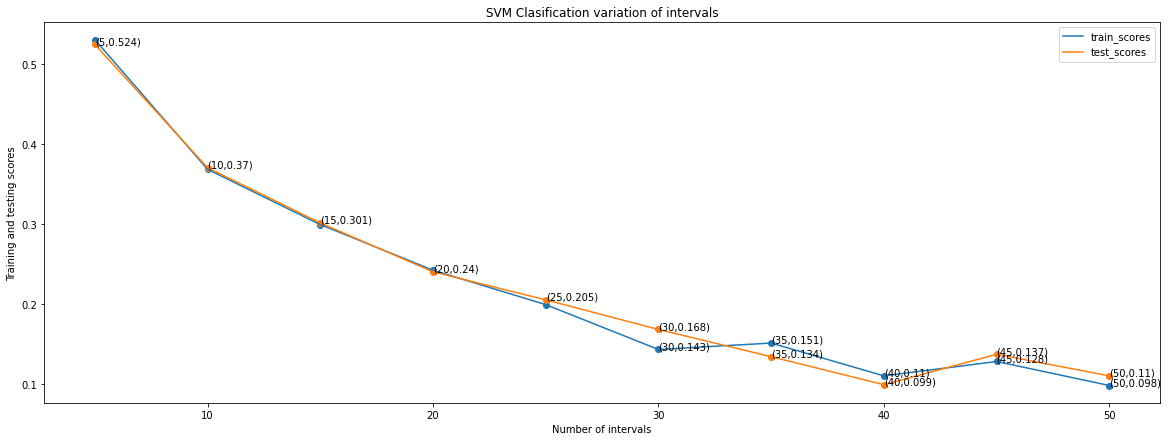

In [58]:
fig, axs = plt.subplots(figsize = (20,7))
plt.scatter(intervals, train_scores)
plt.plot(intervals, train_scores)
plt.scatter(intervals, test_scores)
plt.plot(intervals, test_scores)
plt.title("SVM Clasification variation of intervals")
plt.legend(["train_scores", "test_scores"])
plt.xlabel("Number of intervals")
plt.ylabel("Training and testing scores")
for i in range(0, len(train_scores)):
    if i >= 5:
        plt.annotate(f"({intervals[i]},{train_scores[i]})", (intervals[i], train_scores[i]))
        plt.annotate(f"({intervals[i]},{test_scores[i]})", (intervals[i], test_scores[i]))
    else: 
        plt.annotate(f"({intervals[i]},{test_scores[i]})", (intervals[i], test_scores[i]))
plt.show()

#### SVM regresion sin normalizacion

In [59]:
Y = df["SalePrice"]
X = df.drop(columns = ["SalePrice"]).select_dtypes(np.number)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42) #80% entrenaminto - 20% pruebas

In [60]:
svr = SVR()
svr.fit(x_train, y_train)
svr.score(x_train, y_train) #score de entrenamiento

-0.044922304945536506

In [61]:
svr.score(x_test, y_test) #score de pruebas

-0.02462926562867107

#### SVM regresion con normalizacion

In [62]:
#normalizacion del dataset
scaler = StandardScaler()
df = df.select_dtypes(np.number)
normalized_array = scaler.fit_transform(df)
df_normalized = pd.DataFrame(normalized_array, columns = df.columns.tolist())

In [63]:
Y = df_normalized["SalePrice"]
X = df_normalized.drop(columns = ["SalePrice"])
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42) #80% entrenaminto - 20% pruebas

In [64]:
svrn = SVR()
svrn.fit(x_train, y_train)
svrn.score(x_train, y_train) #score de entrenamiento

0.9075783071843254

In [65]:
svrn.score(x_test, y_test) #score de pruebas"

0.8082306534675462